In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [41]:
data = np.loadtxt('s1.txt')

/Users/redcapella/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/redcapella/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/redcapella/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/redcapella/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) i

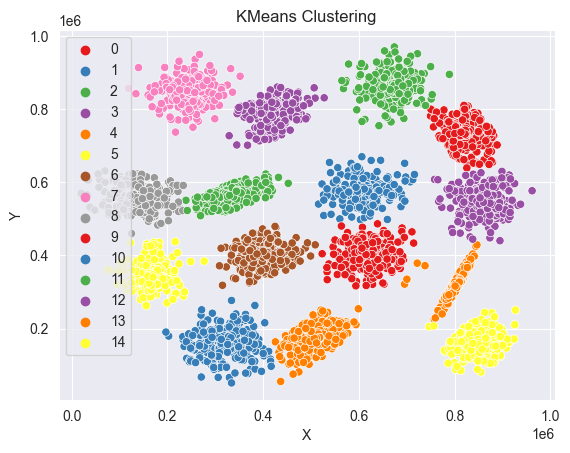

In [66]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(data)

labels = kmeans.labels_

sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette='Set1')
plt.title('KMeans Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

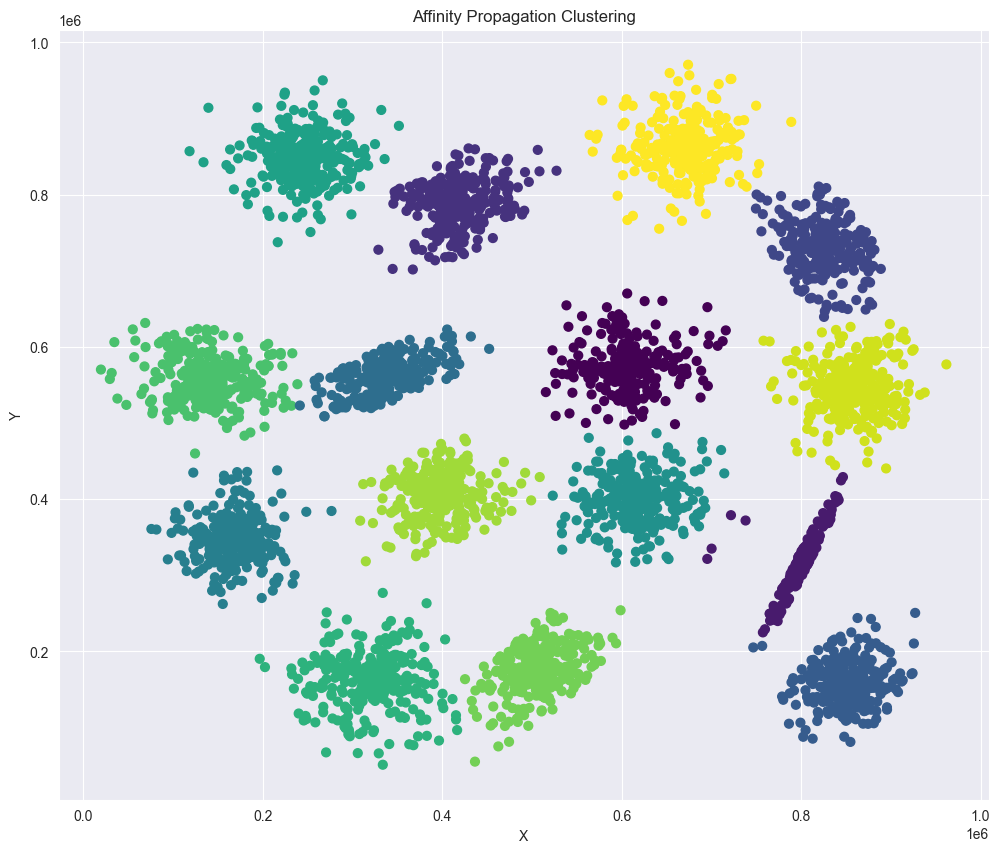

In [71]:
plt.figure(figsize=(12, 10))
affinity_clustering  = AffinityPropagation(damping=0.91, preference=-870000000000)

affinity_clustering.fit(data)

labels = affinity_clustering.predict(data)

plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis')
plt.title('Affinity Propagation Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

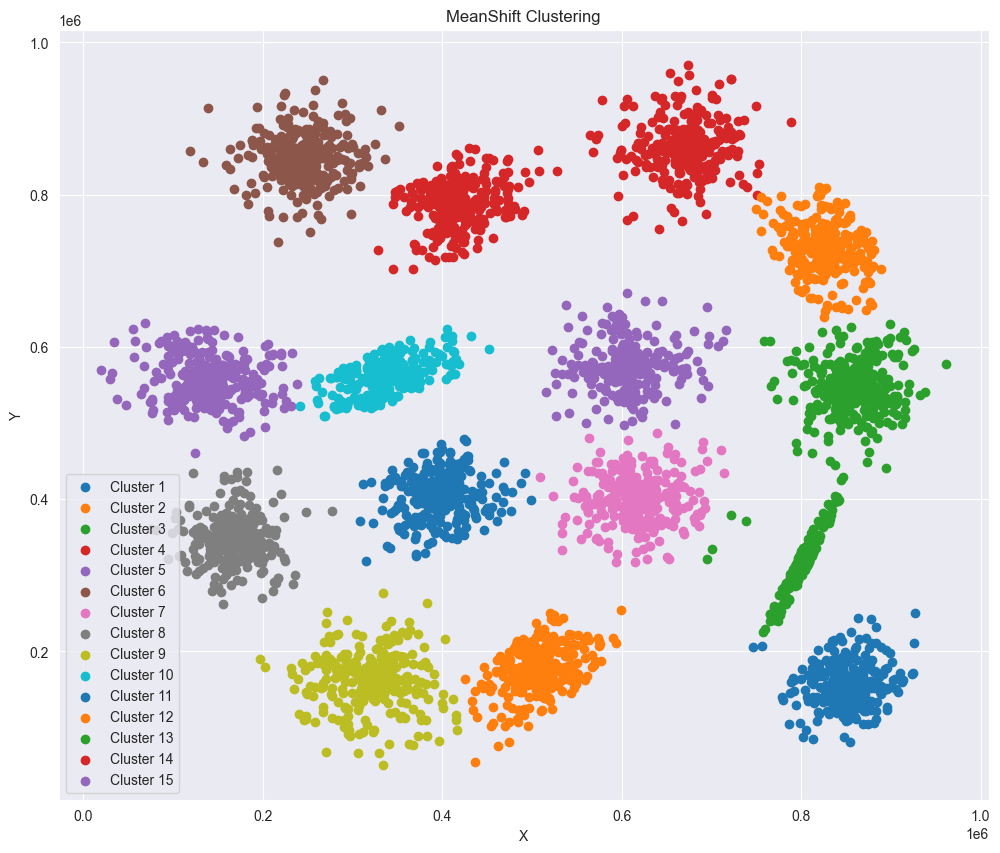

<Figure size 640x480 with 0 Axes>

In [73]:
plt.figure(figsize=(12, 10))
meanshift_clustering = MeanShift(bandwidth = 100000)
meanshift_clustering.fit(data)
labels = meanshift_clustering.labels_
# bandwidth
for i in range(len(np.unique(labels))):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('MeanShift Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
plt.tight_layout()

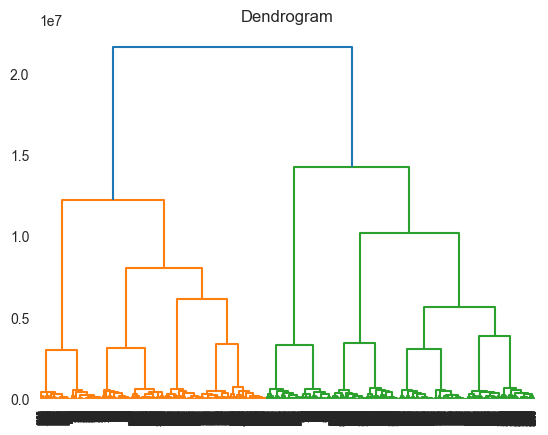

In [45]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')
plt.show()

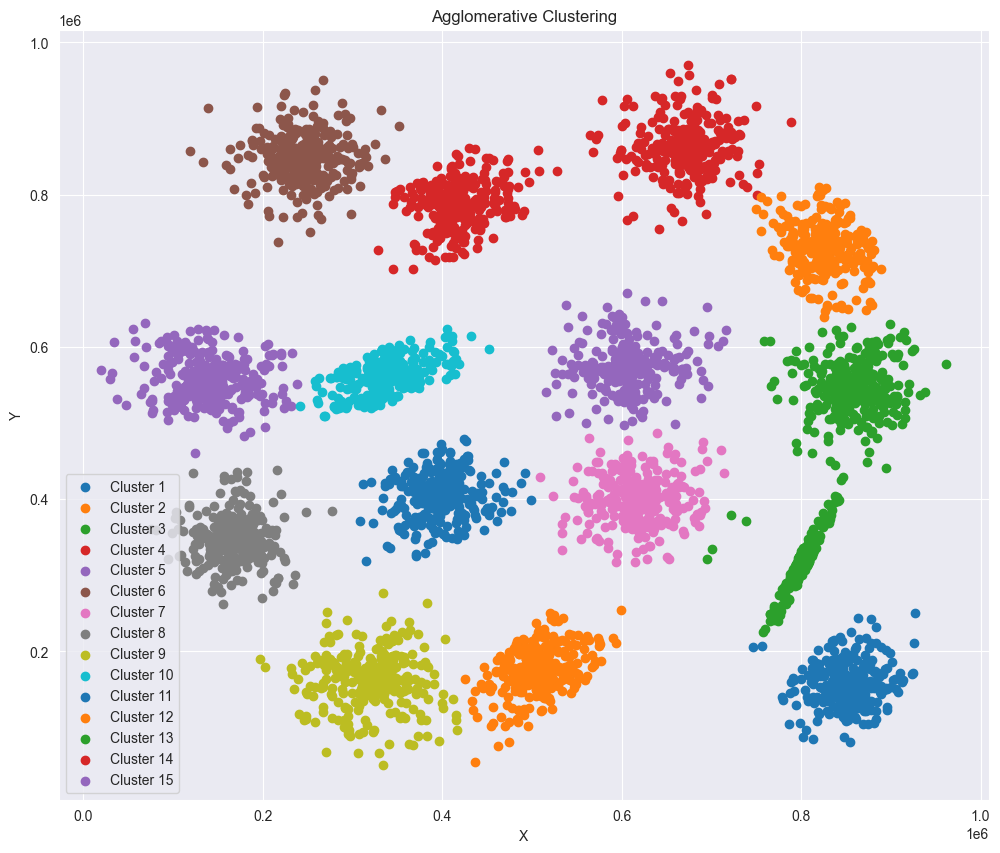

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(12, 10))
agglomerative_clustering = AgglomerativeClustering()
agglomerative_clustering.fit(data)
labels = meanshift_clustering.labels_

for i in range(len(np.unique(labels))):
    cluster_points = data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')

plt.title('Agglomerative Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
plt.tight_layout()

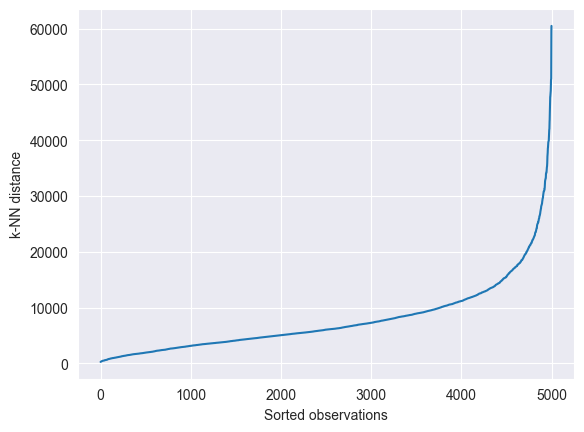

In [47]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors = 5).fit(data)
neigh_dist, neigh_ind = nbrs.kneighbors(data)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations")
plt.show()

34202.18807327976


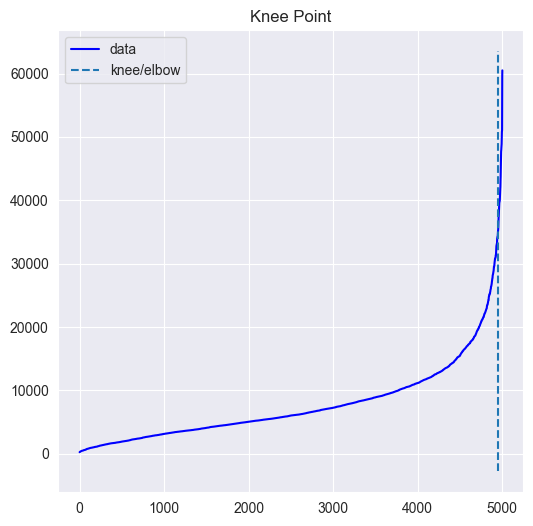

In [62]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "convex")

eps = kneedle.knee_y
print(eps)
kneedle.plot_knee()
plt.show()

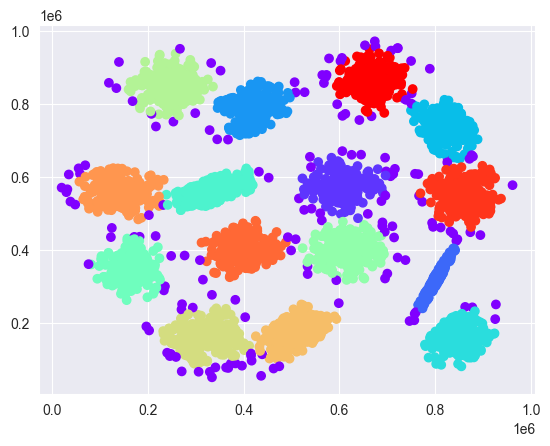

In [63]:
cluster = DBSCAN(eps = eps, min_samples = 30).fit(data)

plt.scatter(data[:, 0], data[:, 1], c=cluster.labels_, cmap='rainbow')
plt.show()